In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam


In [2]:
(x_train, t_train),(x_test, t_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
# 정규화?
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [5]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [6]:
# 모델 구축?
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28,28,1) , kernel_size=(3,3) ,filters=32 ,activation='relu' ))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [9]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [10]:
hist = cnn.fit(x_train, t_train, batch_size = 128, epochs = 30, validation_data =(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 49s 104ms/step - loss: 0.2320 - accuracy: 0.9280 - val_loss: 0.0502 - val_accuracy: 0.9831
Epoch 2/30
469/469 [==============================] - 49s 104ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.0327 - val_accuracy: 0.9887
Epoch 3/30
469/469 [==============================] - 49s 104ms/step - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.0327 - val_accuracy: 0.9891
Epoch 4/30
469/469 [==============================] - 49s 104ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 5/30
469/469 [==============================] - 49s 105ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 6/30
469/469 [==============================] - 49s 105ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0277 - val_accuracy: 0.9909
Epoch 7/30
469/469 [==============================] - 48s 103ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0265 - val_ac

In [11]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0395 - accuracy: 0.9926


[0.039531782269477844, 0.9926000237464905]

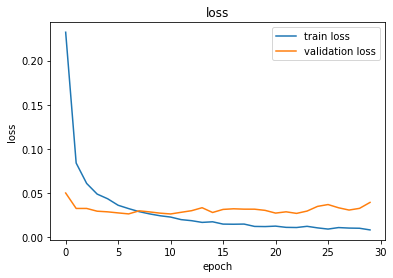

In [13]:
import matplotlib.pyplot as plt

plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

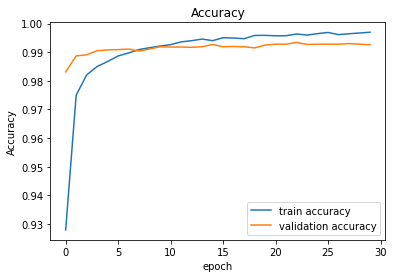

In [14]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()